<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/recipe_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload file manually
dataset = files.upload()


Saving Recipe Reviews and User Feedback Dataset.csv to Recipe Reviews and User Feedback Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [ ]:
# Display the first few rows
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_code      18182 non-null  int64 
 2   recipe_name      18182 non-null  object
 3   comment_id       18182 non-null  object
 4   user_id          18182 non-null  object
 5   user_name        18182 non-null  object
 6   user_reputation  18182 non-null  int64 
 7   created_at       18182 non-null  int64 
 8   reply_count      18182 non-null  int64 
 9   thumbs_up        18182 non-null  int64 
 10  thumbs_down      18182 non-null  int64 
 11  stars            18182 non-null  int64 
 12  best_score       18182 non-null  int64 
 13  text             18180 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.9+ MB


In [ ]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


| Variable Name    | Role    | Type         | Description                                                                       | Units | Missing Values |
|-----------------|---------|-------------|-----------------------------------------------------------------------------------|-------|---------------|
| recipe_number   | Feature | Integer     | placement of the recipe on the top 100 recipes list                              |       | no            |
| recipe_code     | Feature | Integer     | unique id of the recipe used by the site                                         |       | no            |
| recipe_name     | Feature | Categorical | name of the recipe the comment was posted on                                     |       | no            |
| comment_id      | Feature | Categorical | unique id of the comment                                                         |       | no            |
| user_id         | Feature | Categorical | unique id of the user who left the comment                                       |       | no            |
| user_name       | Feature | Categorical | name of the user                                                                 |       | no            |
| user_reputation | Feature | Integer     | internal score of the site, roughly quantifying the past behaviour of the user   |       | no            |
| created_at      | Feature | Integer     | time at which the comment was posted as unix timestamp                           |       | no            |
| reply_count     | Feature | Integer     | number of replies to the comment                                                 |       | no            |
| thumbs_up       | Feature | Integer     | number of up-votes the comment has received                                      |       | no            |
| thumbs_down     | Feature | Integer     | number of down-votes the comment has received                                    |       | no            |
| stars          | Feature | Integer     | the score on a 1 to 5 scale that the user gave to the recipe. 0 means no score   |       | no            |
| best_score      | Feature | Integer     | score of the comment, likely used by the site to determine comment order         |       | no            |
| text           | Feature | Categorical | the text content of the comment                                                  |       | yes           |


Remove unnecessary columns

In [ ]:
df.drop(['recipe_code','comment_id','user_id','user_name','created_at','text'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_name      18182 non-null  object
 2   user_reputation  18182 non-null  int64 
 3   reply_count      18182 non-null  int64 
 4   thumbs_up        18182 non-null  int64 
 5   thumbs_down      18182 non-null  int64 
 6   stars            18182 non-null  int64 
 7   best_score       18182 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
df.head()

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,Creamy White Chili,1,0,0,0,5,527
1,1,Creamy White Chili,50,0,7,0,5,724
2,1,Creamy White Chili,10,0,3,0,5,710
3,1,Creamy White Chili,1,2,2,0,0,581
4,1,Creamy White Chili,10,1,7,0,0,820


In [ ]:
df.describe()

,recipe_number,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,38.689363,2.159608,0.014630,1.089264,0.549335,4.288802,153.162138
std,29.786647,10.014666,0.137974,4.201004,3.470124,1.544786,141.075316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
50%,33.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
75%,64.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
max,100.000000,520.000000,3.000000,106.000000,126.000000,5.000000,946.000000


In [ ]:
df.isna().sum()

,0
recipe_number,0
recipe_name,0
user_reputation,0
reply_count,0
thumbs_up,0
thumbs_down,0
stars,0
best_score,0


In [ ]:
df.duplicated().sum()

14149

In [ ]:
df[df.duplicated()]

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
35,1,Creamy White Chili,1,0,3,0,5,297
43,1,Creamy White Chili,1,0,3,0,5,297
46,1,Creamy White Chili,1,0,1,0,5,193
53,1,Creamy White Chili,1,0,0,0,5,100
55,1,Creamy White Chili,1,0,4,0,5,329
...,...,...,...,...,...,...,...,...
18177,100,Mamaw Emily’s Strawberry Cake,1,0,0,0,5,100
18178,100,Mamaw Emily’s Strawberry Cake,1,0,0,0,5,100
18179,100,Mamaw Emily’s Strawberry Cake,1,0,0,0,5,100
18180,100,Mamaw Emily’s Strawberry Cake,1,0,0,0,5,100


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4033 entries, 0 to 18175
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    4033 non-null   int64 
 1   recipe_name      4033 non-null   object
 2   user_reputation  4033 non-null   int64 
 3   reply_count      4033 non-null   int64 
 4   thumbs_up        4033 non-null   int64 
 5   thumbs_down      4033 non-null   int64 
 6   stars            4033 non-null   int64 
 7   best_score       4033 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 283.6+ KB


In [ ]:
df

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,Creamy White Chili,1,0,0,0,5,527
1,1,Creamy White Chili,50,0,7,0,5,724
2,1,Creamy White Chili,10,0,3,0,5,710
3,1,Creamy White Chili,1,2,2,0,0,581
4,1,Creamy White Chili,10,1,7,0,0,820
...,...,...,...,...,...,...,...,...
18133,100,Mamaw Emily’s Strawberry Cake,1,0,0,0,4,100
18135,100,Mamaw Emily’s Strawberry Cake,1,0,0,1,4,100
18136,100,Mamaw Emily’s Strawberry Cake,1,0,0,2,2,100
18159,100,Mamaw Emily’s Strawberry Cake,1,0,0,2,5,100


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033 entries, 0 to 4032
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    4033 non-null   int64 
 1   recipe_name      4033 non-null   object
 2   user_reputation  4033 non-null   int64 
 3   reply_count      4033 non-null   int64 
 4   thumbs_up        4033 non-null   int64 
 5   thumbs_down      4033 non-null   int64 
 6   stars            4033 non-null   int64 
 7   best_score       4033 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 252.2+ KB


In [ ]:
df

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,Creamy White Chili,1,0,0,0,5,527
1,1,Creamy White Chili,50,0,7,0,5,724
2,1,Creamy White Chili,10,0,3,0,5,710
3,1,Creamy White Chili,1,2,2,0,0,581
4,1,Creamy White Chili,10,1,7,0,0,820
...,...,...,...,...,...,...,...,...
4028,100,Mamaw Emily’s Strawberry Cake,1,0,0,0,4,100
4029,100,Mamaw Emily’s Strawberry Cake,1,0,0,1,4,100
4030,100,Mamaw Emily’s Strawberry Cake,1,0,0,2,2,100
4031,100,Mamaw Emily’s Strawberry Cake,1,0,0,2,5,100


In [ ]:
df.describe()

,recipe_number,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
count,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000
mean,47.549715,5.276221,0.065460,4.433672,2.368460,3.659559,302.402430
std,30.788643,20.668792,0.286397,8.023380,7.064409,1.858831,238.782228
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.000000,0.000000,0.000000,3.000000,100.000000
50%,46.000000,1.000000,0.000000,1.000000,0.000000,5.000000,193.000000
75%,77.000000,1.000000,0.000000,5.000000,2.000000,5.000000,408.000000
max,100.000000,520.000000,3.000000,106.000000,126.000000,5.000000,946.000000


In [ ]:
df.select_dtypes(exclude='object').columns.tolist()

['recipe_number',
 'user_reputation',
 'reply_count',
 'thumbs_up',
 'thumbs_down',
 'stars',
 'best_score']

<Axes: >

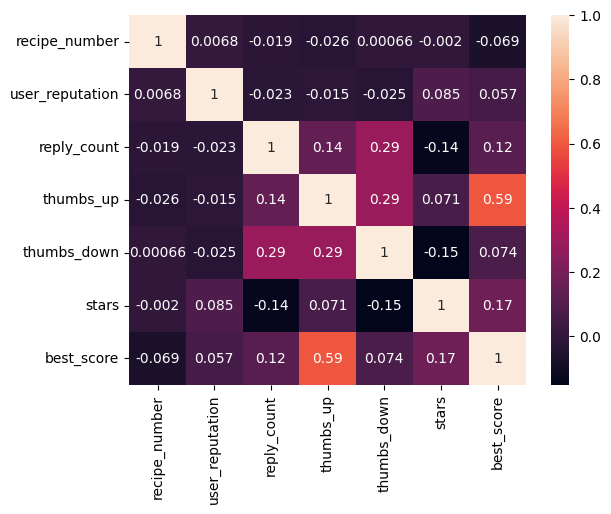

In [ ]:
sns.heatmap(df[df.select_dtypes(exclude='object').columns.tolist()].corr(), annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_before_encode = df.copy()
le = LabelEncoder()
df['recipe_name'] = le.fit_transform(df['recipe_name'])

In [ ]:
df

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,39,1,0,0,0,5,527
1,1,39,50,0,7,0,5,724
2,1,39,10,0,3,0,5,710
3,1,39,1,2,2,0,0,581
4,1,39,10,1,7,0,0,820
...,...,...,...,...,...,...,...,...
4028,100,63,1,0,0,0,4,100
4029,100,63,1,0,0,1,4,100
4030,100,63,1,0,0,2,2,100
4031,100,63,1,0,0,2,5,100


<Axes: >

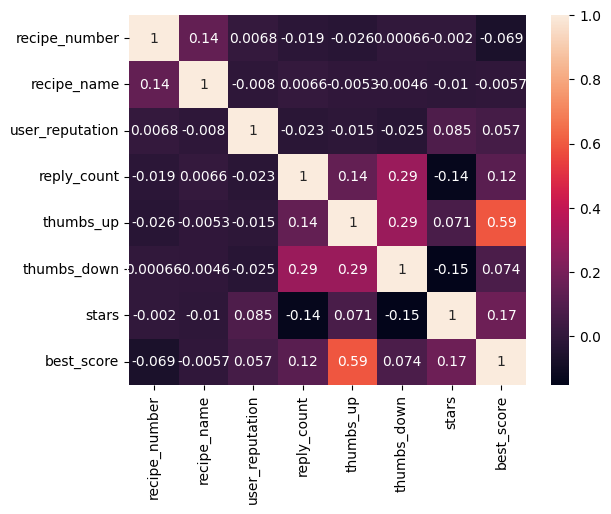

In [ ]:
sns.heatmap(df.corr(), annot=True)

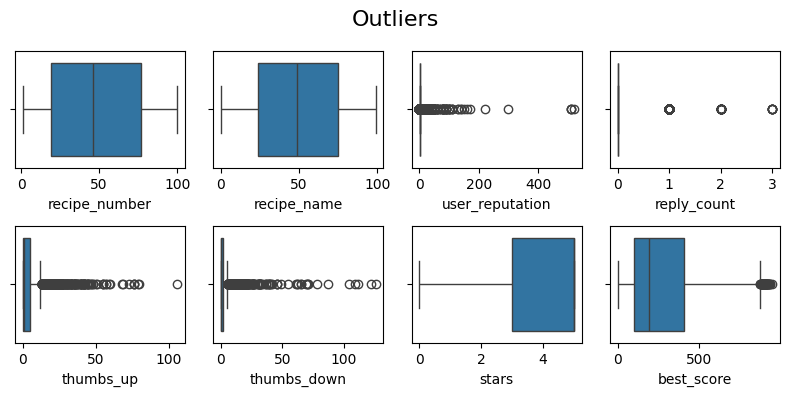

In [ ]:
# check outliers
column_names = df.columns.tolist()
index = 0
plt.figure(figsize=(8,4))
plt.suptitle("Outliers", fontsize = 16)
for col in column_names:
    index+=1
    plt.subplot(2,4,index)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [ ]:
zdf= df.copy()

In [ ]:
zdf.columns.tolist()

['recipe_number',
 'recipe_name',
 'user_reputation',
 'reply_count',
 'thumbs_up',
 'thumbs_down',
 'stars',
 'best_score']

In [ ]:
from scipy.stats import zscore
# cap with z score
column_names = ['user_reputation','reply_count','thumbs_up','thumbs_down','best_score']
for col in column_names:               # loop through every column in zdf
    z_score = zscore(zdf[col])         # calculate the Z-score for the column
    outlier_mask = np.abs(z_score) > 3 # make mask of outliers
    upper_bound = zdf[col][~outlier_mask].max() # invert the mask and get the max of non outlier value
    lower_bound = zdf[col][~outlier_mask].min() # invert the mask and get the min of non outlier value
    zdf[col] = np.where(z_score > 3, upper_bound, np.where(z_score < -3, lower_bound, zdf[col])) # cap the outlier values

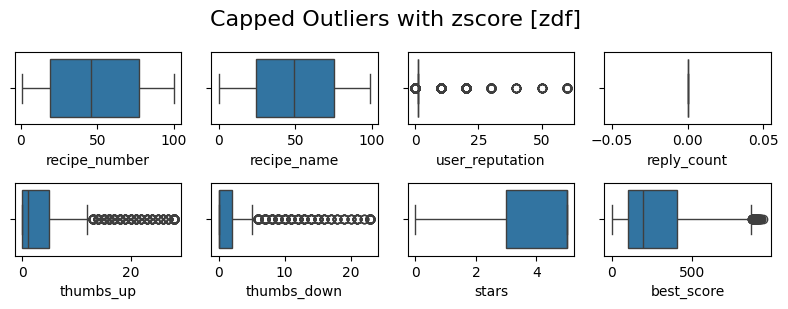

In [ ]:
# check outliers after capping with z score
column_names = zdf.columns.tolist()
index = 0
plt.figure(figsize=(8,4))
plt.suptitle("Capped Outliers with zscore [zdf]", fontsize = 16)
for col in column_names:
    index+=1
    plt.subplot(3,4,index)
    sns.boxplot(x=zdf[col])
plt.tight_layout()
plt.show()

In [ ]:
IQRdf = df.copy() # make a df copy to make outlier capped df with IQR methode

In [ ]:
column_names = ['user_reputation','reply_count','thumbs_up','thumbs_down','best_score']
for col in column_names:
    Q1 = IQRdf[col].quantile(0.25)
    Q3 = IQRdf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    IQRdf[col] = np.where(IQRdf[col] < lower_bound, lower_bound, np.where(IQRdf[col] > upper_bound, upper_bound, IQRdf[col]))

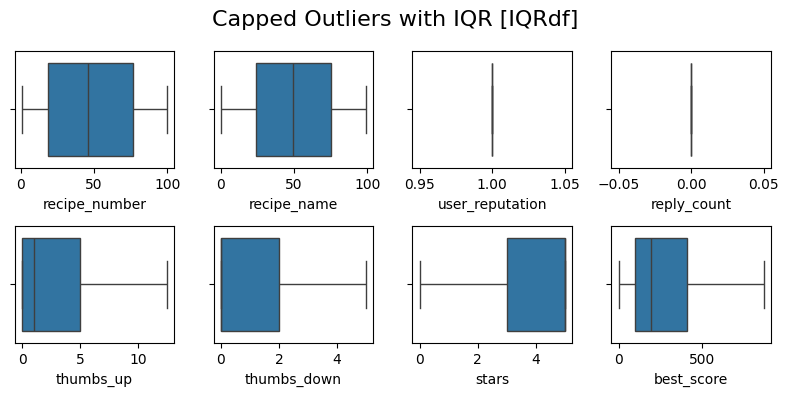

In [ ]:
#outliers capped with IQR
column_names = IQRdf.columns.tolist()
index = 0
plt.figure(figsize=(8,4))
plt.suptitle("Capped Outliers with IQR [IQRdf]", fontsize = 16)
for col in column_names:
    index+=1
    plt.subplot(2,4,index)
    sns.boxplot(x=IQRdf[col])
plt.tight_layout()
plt.show()

In [ ]:
IQRdf.skew()

,0
recipe_number,0.094842
recipe_name,-0.026378
user_reputation,0.000000
reply_count,0.000000
thumbs_up,1.202765
thumbs_down,1.245649
stars,-1.077873
best_score,1.058621


In [ ]:
# List of columns to apply log1p transformation
log_columns = ["thumbs_up", "thumbs_down", "best_score"]

# Apply log1p transformation
IQRdf[log_columns] = IQRdf[log_columns].apply(np.log1p)

In [ ]:
IQRdf.skew()

,0
recipe_number,0.094842
recipe_name,-0.026378
user_reputation,0.000000
reply_count,0.000000
thumbs_up,0.333282
thumbs_down,0.678418
stars,-1.077873
best_score,-0.251044


In [ ]:
zdf.skew()

,0
recipe_number,0.094842
recipe_name,-0.026378
user_reputation,3.788586
reply_count,0.000000
thumbs_up,2.234186
thumbs_down,3.325329
stars,-1.077873
best_score,1.067987


In [ ]:
# List of columns to apply log1p transformation
log_columns = ["user_reputation","thumbs_up", "thumbs_down", "best_score"]

# Apply log1p transformation
zdf[log_columns] = zdf[log_columns].apply(np.log1p)

In [ ]:
zdf.skew()

,0
recipe_number,0.094842
recipe_name,-0.026378
user_reputation,1.795592
reply_count,0.000000
thumbs_up,0.558525
thumbs_down,1.253360
stars,-1.077873
best_score,-0.247806


In [ ]:
df.skew()

,0
recipe_number,0.094842
recipe_name,-0.026378
user_reputation,16.827631
reply_count,5.132803
thumbs_up,4.130898
thumbs_down,8.776352
stars,-1.077873
best_score,1.067987


In [ ]:
xdf = df.drop(columns=['stars'])

In [ ]:
xdf.head()

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,best_score
0,1,39,1,0,0,0,527
1,1,39,50,0,7,0,724
2,1,39,10,0,3,0,710
3,1,39,1,2,2,0,581
4,1,39,10,1,7,0,820


In [ ]:
ydf = df['stars']

In [ ]:
ydf.head()

,stars
0,5
1,5
2,5
3,0
4,0


In [ ]:
xiqr = IQRdf.drop(columns=['stars'])
yiqr = IQRdf['stars']

In [ ]:
xzscore = zdf.drop(columns=['stars'])
yzscore = zdf['stars']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Standardize numeric features (helps with feature selection)
scalar = StandardScaler()
xiqr_scaled = scalar.fit_transform(xiqr)

# Use SelectKBest to select the top 5 features
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Use chi2 if features are categorical
X_new = selector.fit_transform(xiqr_scaled, yiqr)

# Get selected feature names
selected_features = xiqr.columns[selector.get_support()]
print("Best 5 Features Selected:\n", selected_features)

Best 5 Features Selected:
 Index(['recipe_name', 'reply_count', 'thumbs_up', 'thumbs_down', 'best_score'], dtype='object')


In [ ]:
zx = zdf.drop('stars',axis=1)
zy = zdf['stars']
IQRx = IQRdf.drop('stars',axis=1)
IQRy = IQRdf['stars']
scaled_zdf_x = scalar.fit_transform(zx)
scaled_IQRdf_x = scalar.fit_transform(IQRx)

In [ ]:
scaled_zdf = pd.DataFrame(scaled_zdf_x,columns=zx.columns)
scaled_zdf['stars'] = zy
scaled_IQRdf = pd.DataFrame(scaled_IQRdf_x,columns=IQRx.columns)
scaled_IQRdf['stars'] = IQRy

In [ ]:
scaled_zdf

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,best_score,stars
0,-1.512099,-0.363617,-0.426643,0.0,-1.069427,-0.786212,1.083941,5
1,-1.512099,-0.363617,3.210447,0.0,0.995282,-0.786212,1.488298,5
2,-1.512099,-0.363617,1.487818,0.0,0.307045,-0.786212,1.463431,5
3,-1.512099,-0.363617,-0.426643,0.0,0.021401,-0.786212,1.208119,0
4,-1.512099,-0.363617,1.487818,0.0,0.995282,-0.786212,1.646880,0
...,...,...,...,...,...,...,...,...
4028,1.703771,0.467478,-0.426643,0.0,-1.069427,-0.786212,-1.025329,4
4029,1.703771,0.467478,-0.426643,0.0,-1.069427,0.053620,-1.025329,4
4030,1.703771,0.467478,-0.426643,0.0,-1.069427,0.544891,-1.025329,2
4031,1.703771,0.467478,-0.426643,0.0,-1.069427,0.544891,-1.025329,5


In [ ]:
scaled_IQRdf

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,best_score,stars
0,-1.512099,-0.363617,0.0,0.0,-1.114332,-0.868552,1.085188,5
1,-1.512099,-0.363617,0.0,0.0,1.121226,-0.868552,1.489851,5
2,-1.512099,-0.363617,0.0,0.0,0.376040,-0.868552,1.464965,5
3,-1.512099,-0.363617,0.0,0.0,0.066760,-0.868552,1.209460,0
4,-1.512099,-0.363617,0.0,0.0,1.121226,-0.868552,1.648552,0
...,...,...,...,...,...,...,...,...
4028,1.703771,0.467478,0.0,0.0,-1.114332,-0.868552,-1.025672,4
4029,1.703771,0.467478,0.0,0.0,-1.114332,0.175478,-1.025672,4
4030,1.703771,0.467478,0.0,0.0,-1.114332,0.786197,-1.025672,2
4031,1.703771,0.467478,0.0,0.0,-1.114332,0.786197,-1.025672,5


In [ ]:
IQRy

,stars
0,5
1,5
2,5
3,0
4,0
...,...
4028,4
4029,4
4030,2
4031,5


In [ ]:
x=scaled_IQRdf[['recipe_number', 'recipe_name', 'thumbs_up', 'thumbs_down',
       'best_score']]
y= scaled_IQRdf['stars']

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions
y_pred = lr_model.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1.8017
R² Score: 0.0480


In [ ]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=1bb39519ddbe4e0d300215af9348bbecb75e4e4b8678c644460ef73970e9d5eb
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [ ]:
from mord import OrdinalRidge  # Ordinal Regression model
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
# Train Ordinal Regression model
ord_reg = OrdinalRidge()
ord_reg.fit(x_train, y_train)

OrdinalRidge()

In [ ]:
# Make predictions
y_pred = ord_reg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


In [ ]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = accuracy_score(y_test, np.round(y_pred))  # Round predictions for classification accuracy

# Print results
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy: {accuracy:.4f}")

RMSE: 1.8291
Accuracy: 0.1214


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
from catboost import CatBoostClassifier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033 entries, 0 to 4032
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   recipe_number    4033 non-null   int64
 1   recipe_name      4033 non-null   int64
 2   user_reputation  4033 non-null   int64
 3   reply_count      4033 non-null   int64
 4   thumbs_up        4033 non-null   int64
 5   thumbs_down      4033 non-null   int64
 6   stars            4033 non-null   int64
 7   best_score       4033 non-null   int64
dtypes: int64(8)
memory usage: 252.2 KB


In [ ]:
IQRdf.head()

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,39,1.0,0.0,0.000000,0.0,5,6.269096
1,1,39,1.0,0.0,2.079442,0.0,5,6.586172
2,1,39,1.0,0.0,1.386294,0.0,5,6.566672
3,1,39,1.0,0.0,1.098612,0.0,0,6.366470
4,1,39,1.0,0.0,2.079442,0.0,0,6.710523


['recipe_number', 'recipe_name', 'thumbs_up', 'thumbs_down',      'best_score']

In [ ]:
catdf = zdf.copy()

In [ ]:
catdf

,recipe_number,recipe_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,39,0.693147,0,0.000000,0.000000,5,6.269096
1,1,39,3.931826,0,2.079442,0.000000,5,6.586172
2,1,39,2.397895,0,1.386294,0.000000,5,6.566672
3,1,39,0.693147,0,1.098612,0.000000,0,6.366470
4,1,39,2.397895,0,2.079442,0.000000,0,6.710523
...,...,...,...,...,...,...,...,...
4028,100,63,0.693147,0,0.000000,0.000000,4,4.615121
4029,100,63,0.693147,0,0.000000,0.693147,4,4.615121
4030,100,63,0.693147,0,0.000000,1.098612,2,4.615121
4031,100,63,0.693147,0,0.000000,1.098612,5,4.615121


In [ ]:
# Define features (X) and target (y)
X = zdf[['recipe_number', 'recipe_name', 'thumbs_up', 'thumbs_down', 'best_score']]
X['recipe_name'] = df_before_encode['recipe_name']
y = zdf["stars"]  # Target variable


# Identify categorical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<ipython-input-72-562429816744>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['recipe_name'] = df_before_encode['recipe_name']


In [ ]:
# Train CatBoost model
cat_model = CatBoostClassifier(
    iterations=1000,  # Number of boosting rounds
    depth=7,  # Tree depth
    learning_rate=0.001,
    loss_function="MultiClass",
    cat_features=categorical_features,
    verbose=100  # Show training progress
)
cat_model.fit(X_train, y_train)

# Make predictions
y_pred = cat_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy: {accuracy:.4f}")

0:	learn: 1.7906125	total: 96ms	remaining: 1m 35s
100:	learn: 1.6880974	total: 3.45s	remaining: 30.7s
200:	learn: 1.6119818	total: 7.28s	remaining: 28.9s
300:	learn: 1.5527471	total: 11.1s	remaining: 25.8s
400:	learn: 1.5057598	total: 15.7s	remaining: 23.4s
500:	learn: 1.4675897	total: 20.1s	remaining: 20s
600:	learn: 1.4358858	total: 23.9s	remaining: 15.9s
700:	learn: 1.4092577	total: 29s	remaining: 12.4s
800:	learn: 1.3868610	total: 33.5s	remaining: 8.32s
900:	learn: 1.3676333	total: 37.6s	remaining: 4.14s
999:	learn: 1.3513137	total: 42.7s	remaining: 0us
RMSE: 2.2914
Accuracy: 0.5514


In [ ]:
zdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033 entries, 0 to 4032
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_number    4033 non-null   int64  
 1   recipe_name      4033 non-null   int64  
 2   user_reputation  4033 non-null   float64
 3   reply_count      4033 non-null   int64  
 4   thumbs_up        4033 non-null   float64
 5   thumbs_down      4033 non-null   float64
 6   stars            4033 non-null   int64  
 7   best_score       4033 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 252.2 KB


In [ ]:
X

,recipe_number,recipe_name,thumbs_up,thumbs_down,best_score
0,1,Creamy White Chili,0.000000,0.000000,6.269096
1,1,Creamy White Chili,2.079442,0.000000,6.586172
2,1,Creamy White Chili,1.386294,0.000000,6.566672
3,1,Creamy White Chili,1.098612,0.000000,6.366470
4,1,Creamy White Chili,2.079442,0.000000,6.710523
...,...,...,...,...,...
4028,100,Mamaw Emily’s Strawberry Cake,0.000000,0.000000,4.615121
4029,100,Mamaw Emily’s Strawberry Cake,0.000000,0.693147,4.615121
4030,100,Mamaw Emily’s Strawberry Cake,0.000000,1.098612,4.615121
4031,100,Mamaw Emily’s Strawberry Cake,0.000000,1.098612,4.615121
